In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('game_data.csv', index_col=0)

cols = ['Player Type','Player Levels','Opponent Type','Opponent Levels','Player Score','Opponent Score','Score Differential','Player Pieces Left','Opponent Pieces Left','# rounds','w1 - score per opp dot','w2 - opp dot dist from player start','w3 - score per opp dot open corners #','w4 - score per player dot','w5 - player dot dist from opp start','w6 - score per player dot open corners #','w7 - player score multiplier','w8 - opponent score multiplier','w9 - piece difficulty weight','only 5s rounds','rounds choosing only difficult pieces','# of difficult pieces included']

print(df.head)
print(df.ndim, ' dimensions')
print(df.shape, ' shape')
print(df.size, ' size')


<bound method NDFrame.head of                    Player_Levels Opponent_Type     Opponent_Levels  \
Player_Type                                                          
playSmart_v2            [[0, 1]]    randomTurn            [[0, 1]]   
randomTurn              [[0, 1]]  playSmart_v2            [[0, 1]]   
randomTurn              [[0, 1]]  playSmart_v1            [[0, 1]]   
playSmart_v1            [[0, 1]]    randomTurn            [[0, 1]]   
playSmart_v1            [[0, 1]]  playSmart_v2            [[0, 1]]   
...                          ...           ...                 ...   
randomTurn              [[0, 1]]  playSmart_v1                   0   
playSmart_v2              [0, 1]  playSmart_v1  [[575, 1], [0, 2]]   
playSmart_v1  [[575, 1], [0, 2]]  playSmart_v2              [0, 1]   
playSmart_v1                   0    randomTurn            [[0, 1]]   
randomTurn              [[0, 1]]  playSmart_v1                   0   

              Player_Score  Opponent_Score  Score_Different

Player_Type
playSmart_v2          NaN
randomTurn            NaN
randomTurn            NaN
playSmart_v1          NaN
playSmart_v1          NaN
                  ...    
randomTurn       2.060740
playSmart_v2    35.879141
playSmart_v1    35.879141
playSmart_v1     1.970862
randomTurn       1.970862
Name: time taken, Length: 176, dtype: float64


<Axes: xlabel='Player_Score', ylabel='w1 - score per opp dot'>

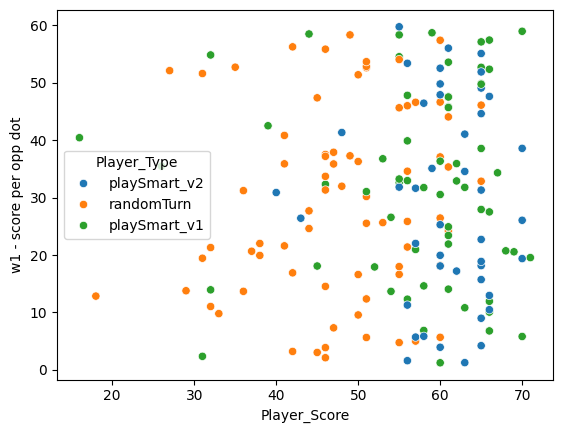

In [17]:
import seaborn as sns
print(df.loc[:, 'time taken'])
# sns.scatterplot(x="Player_Score", y="Opponent_Score", data=df, hue="Player_Type")
sns.scatterplot(x="Player_Score", y="w1 - score per opp dot", data=df, hue="Player_Type")



In [ ]:
inputs = [] # we want a combination of all the weights for a specific 
outputs = 